Tackling large amount of time taken for a Mercedes Benz car to pass testing by reducing the permutation of car features used during testing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [2]:
print(train.shape)
print(test.shape)
train.describe()

(4209, 378)
(4209, 377)


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
type(train['y'][0])

numpy.float64

The target variable is of type float, which is a continuous variable.

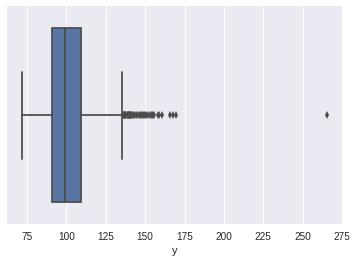

In [ ]:
ax=sns.boxplot(x=train['y'])

There seem to be outliers in the dependent variable. 

In [2]:
df_train=train[train['y']<175]
df_train.shape

(4208, 378)

In [ ]:
sum(df_train.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

0

Fortunately, there seem to be no missing values.

In [4]:
df_train.select_dtypes(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
5,t,b,e,c,d,g,h,s
6,al,r,e,f,d,f,h,s
7,o,l,as,f,d,f,j,a
8,w,s,as,e,d,f,i,h
9,j,b,aq,c,d,f,a,e


In [3]:
new_train=pd.get_dummies(df_train,columns=['X0','X1','X2','X3','X4','X5','X6','X8'])

Transformed the categorical variables using one hot encoding

In [4]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(new_train.drop(['y','ID'],1),new_train['y'],test_size=0.2)

Trying to adopt dimensionality reduction techniques to reduce the number of features and improve testing time

In [ ]:
from sklearn.linear_model import Lasso
m1=Lasso(alpha=0.1,fit_intercept=True,normalize=True)
m1.fit(trainx,trainy)
p1=m1.predict(testx)
print(m1.score(testx,testy))

0.17413900156


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
m2=LinearRegression()
rfe=RFECV(estimator=m2, step=1, cv=KFold(n_splits=10), scoring='neg_mean_squared_error')
rfe.fit(trainx, trainy)
f=[f for f,s in zip(trainx.columns,rfe.support_) if s]
trainxnew=trainx[f]
testxnew=testx[f]
m2.fit(trainxnew,trainy)
m2.score(testxnew,testy)

0.096377103419861165

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.5,svd_solver='full')
trainpca=pca.fit_transform(trainx)
testpca=pca.transform(testx)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
params={'C':[0.001,0.01,0.1,1.0,10.0]}
s=svm.SVR()
m3=GridSearchCV(s,params,cv=10)
m3.fit(trainpca,trainy)
m3.score(testpca,testy)

0.5044923399713005

In [ ]:
from sklearn.ensemble import RandomForestRegressor
score_rf=[]
for i in range(50,500):
    m4=RandomForestRegressor(n_estimators=i,max_depth=10,max_features='sqrt')
    m4.fit(trainx,trainy)
    score_rf.append(m4.score(testx,testy))

In [ ]:
print(score_rf.index(max(score_rf)))
print(max(score_rf))

14
0.56340599322


In [5]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import scipy.stats as st

In [6]:
params={"n_estimators": st.randint(3, 150),
    "max_depth": st.randint(3, 10),
    "learning_rate": st.uniform(0.05, 0.5),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0, 10)}
xgbreg=XGBRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
m5 = RandomizedSearchCV(xgbreg, params, cv=10)  
m5.fit(trainx, trainy)  
m5.score(testx,testy)  

0.59572207538241728

XGBoost outperforms all methods of dimensionality reduction and prediction of the target variable.